In [104]:
import requests
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols


In [3]:

def log_in():
    '''This function logs the scrapper into the main menu with the approiate cookies'''
    login_data = {'Username': 'msimone',
                  'Password': 'targetsteel1',
                  'RememberMe': 'false'}

    
    session = requests.Session()


    login_screen = session.get('https://pc.arcelormittal.com/PartnerCentre/Login')

    login_soup = soup(login_screen.content, 'lxml')

    # this f value is dynamic

    login_data['f'] = login_soup.find('input', {'name': 'f'})['value']

    form_url = 'https://pc.arcelormittal.com/PartnerCentre/Login/account/login/'

    main_page = session.post(form_url, login_data)
    
    return main_page, session


In [4]:
main_page, session = log_in()


In [5]:
# this code is an example of pulling data from the reports tab 

table_soup = soup(session.get('https://pc.arcelormittal.com/PartnerCentre/inv4Sale_InvConsReport.asp?RptID=53').text,
                  'html.parser')

In [23]:
target_steel_report_table = table_soup.find('table', {'border': "1", 'cellpadding':'3'})

In [24]:
target_steel_report_table.th.text


'Sorted by\xa0Minor Product, Business Unit, Category, Gauge, Width, Weight, Location, Grade\r\n'

In [25]:
# creating col names from bs
col_names = []
for th in target_steel_report_table.findAll('th'):
    col_names.append(th.text)

del col_names[0]    
    
# del col_names[0:4]
# del col_names[-1]
col_names    

['Select',
 'Piece ID / Ref#',
 'Minor Product',
 'Business Unit',
 'Category',
 'Gauge',
 'Width',
 'Weight',
 'Location',
 'Grade',
 'Chemistry',
 'Comment',
 'Defect',
 'Trans#']

In [26]:
# extracting data using bs
table_iterator = target_steel_report_table.findAll('td')
# del table_iterator[0]

for i in range(len(table_iterator)):
    table_iterator[i] = table_iterator[i].text.rstrip()

In [27]:
# initalizing dictionary

business_unit_dict = {el:None for el in col_names}

business_unit_dict


{'Select': None,
 'Piece ID / Ref#': None,
 'Minor Product': None,
 'Business Unit': None,
 'Category': None,
 'Gauge': None,
 'Width': None,
 'Weight': None,
 'Location': None,
 'Grade': None,
 'Chemistry': None,
 'Comment': None,
 'Defect': None,
 'Trans#': None}

In [28]:
# creating bluebring for stripping text



In [29]:
table_iterator[0:14] # there are 14 elements per row in table_iterator

# getting the number of observations per row

number_of_rows = int(len(table_iterator)/14)

number_of_rows

80

In [30]:
# reshaping table_iterator
table_iterator_np = np.array(table_iterator)

table_iterator_np.shape = (number_of_rows,14)

In [31]:
table_iterator_np_T = table_iterator_np.T

In [32]:
for i in range(table_iterator_np_T.shape[0]):
    business_unit_dict[list(business_unit_dict.keys())[i]] = table_iterator_np_T[i]

In [46]:
business_unit_dict['Gauge'] = business_unit_dict['Gauge'].astype(np.float)
business_unit_dict['Width'] = business_unit_dict['Width'].astype(np.float)
business_unit_dict['Weight'] = business_unit_dict['Weight'].astype(np.float)


final_report_df = pd.DataFrame(business_unit_dict)

In [47]:
final_report_df

,Select,Piece ID / Ref#,Minor Product,Business Unit,Category,Gauge,Width,Weight,Location,Grade,Chemistry,Comment,Defect,Trans#
0,,T342611 / 823E6530051A,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0242,64.0625,30860.0,BURNS HARBOR,1/2 HARD,C: .054 MN: .65 S: .003 P: .010 SI: .244 CB: ....,1/2 HARD,EXCESS,
1,,T34499R / 832C3440002A,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0272,37.1718,27395.0,BURNS HARBOR,CQ,C: .007 MN: .23 S: .007 P: .023 SI: .006 CB: ....,,EXCESS,
2,,T34500R / 831C0930003A,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0272,37.1718,27685.0,BURNS HARBOR,CQ,C: .006 MN: .24 S: .004 P: .024 SI: .007 CB: ....,,EXCESS,
3,,286617608 / 842A3552051A,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0378,22.0590,4307.0,PRECISION-KENTON,IR612CD,C: .040 MN: .16 S: .006 P: .009 SI: .010 CB: ....,RESELL FOR DROP CUT PER CHARLO,DROP CUT,
4,,B831827B / 843B6395054A,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0394,23.5226,13340.0,ARLINGTON METALS CORP-SAWYER,AR108CJ,C: .010 MN: .20 S: .005 P: .021 SI: .005 CB: ....,,DROP CUT,
5,,291057008 / 813C6826008A,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0453,23.9744,5575.0,PRECISION-KENTON,HR230CD,C: .110 MN:1.05 S: .004 P: .014 SI: .284 CB: ....,RESELL FOR OFF FALL PER CHARLO,DROP CUT,
6,,877065302 / Y2267364T,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0472,13.5000,7073.0,PRECISION-TALLADEGA,GM03012,C: .097 MN:1.52 S: .004 P: .018 SI: .190 CB: ....,,DROP CUT,
7,,9021694 / Y2267364T,ALL OTHER CR,USA - Burns Harbor,Reapp,0.0551,14.4600,6958.0,HORIZON-SHELBY TOWNSHIP,GM03012,C: .097 MN:1.52 S: .004 P: .018 SI: .190 CB: ....,,DROP CUT,
8,,T387582 / 843E6236051A,ALL OTHER CR,USA - Burns Harbor,Salvage,0.0240,61.6875,41860.0,BURNS HARBOR,1/2 HARD,C: .056 MN: .67 S: .004 P: .016 SI: .265 CB: ....,1/2 HARD,1)ROLL SLUG MK TM 2)HOLES,
9,,1509910 / 822D3314052A,ALL OTHER CR,USA - Burns Harbor,Salvage,0.0246,56.9375,22000.0,BURNS HARBOR,1/2 HARD,C: .115 MN:1.04 S: .003 P: .013 SI: .295 CB: ....,1/2 HARD,GEN BAD SHAPE,


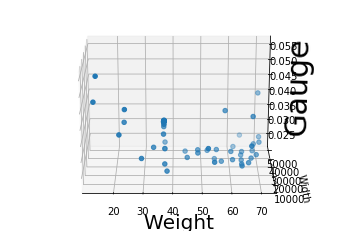

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(final_report_df['Width'], final_report_df['Weight'], final_report_df['Gauge'], zdir='z', s=20, c=None, depthshade=True)
ax.set_xlabel('Weight', fontsize=20, rotation=150)
ax.set_ylabel('Width')
ax.set_zlabel('Gauge', fontsize=30, rotation=60)

ax.view_init(20, -90)


(array([17., 13.,  2., 40.,  1.,  4.,  1.,  1.,  0.,  1.]),
 array([0.0228 , 0.02603, 0.02926, 0.03249, 0.03572, 0.03895, 0.04218,
        0.04541, 0.04864, 0.05187, 0.0551 ]),
 <a list of 10 Patch objects>)

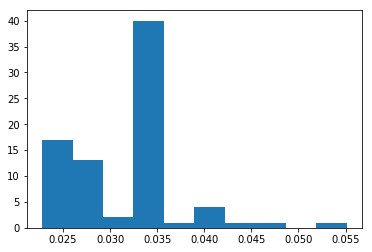

In [80]:
plt.hist(final_report_df['Gauge'])

In [81]:
# creating a CI for the mean value of Gauge
print(np.mean(final_report_df['Gauge']))
print(sms.DescrStatsW(final_report_df['Gauge']).tconfint_mean())


0.03258124999999999
(0.03123103303332124, 0.03393146696667876)


In [122]:
# creating a quick model to predict gauge using width and weight

model = ols("Gauge ~ Width + Weight", final_report_df).fit()

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gauge   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     32.46
Date:                Thu, 30 May 2019   Prob (F-statistic):           5.99e-11
Time:                        12:56:33   Log-Likelihood:                 319.83
No. Observations:                  80   AIC:                            -633.7
Df Residuals:                      77   BIC:                            -626.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0454      0.002     23.378      0.000       0.042       0.049
Width         -0.0003   3.78e-05     -7.729      0.000      -0.000      -0.000
Weight      9.505e-09   5.74e-08      0.166      0.869   -1.05e-07    1.24e-07
==============================================================================
Omnibus:                       23.958   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.874
Skew:                           1.073   Prob(JB):                     6.63e-11
Kurtosis:                       6.076   Cond. No.                     1.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

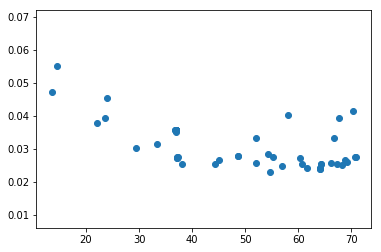

In [127]:
plt.scatter(final_report_df['Width'], final_report_df['Gauge'])